In [2]:
import numpy as np
import pandas as pd

import seaborn as sns
from matplotlib import pyplot as plt

from scipy.stats import probplot

# 2021년 국민건강보험공단_건강검진정보
- 흡연상태: 피우지 않는다 1, 이전에 피웠으나 끊었다 2, 현재도 피우고 있다 3

In [3]:
#해당 치아 데이터 수치는 2002~2013에만 있음
smoke = pd.read_csv("C:/Users/pc/Desktop/민지/공모전/미래사회 아이디어 공모전/국민건강보험공단_건강검진정보_20211231.CSV", encoding='CP949')
smoke.drop(['치아우식증유무','결손치유무','치아마모증유무','제3대구치(사랑니)이상', '치석'], axis=1, inplace=True)
smoke.head(5)

,기준년도,가입자 일련번호,시도코드,성별코드,연령대코드(5세 단위),신장(5cm 단위),체중(5kg 단위),허리둘레,시력(좌),시력(우),...,콜레스테롤(LDL),혈색소,요단백,혈청크레아티닌,간기능검사(AST),간기능검사(ALT),감마지티피,흡연상태,음주여부,구강검진수검여부
0,2021,3603281,26,2,9,165,60,83.0,1.0,1.0,...,NaN,14.4,1.0,0.8,23.0,28.0,11.0,1.0,1.0,1
1,2021,1055961,11,1,11,170,70,84.0,0.9,1.0,...,NaN,15.0,1.0,0.9,22.0,24.0,104.0,3.0,0.0,0
2,2021,3237995,43,1,14,170,70,94.0,0.8,0.4,...,122.0,15.5,1.0,0.8,45.0,57.0,191.0,2.0,1.0,0
3,2021,3171504,49,1,11,175,80,95.0,1.2,1.2,...,NaN,16.0,1.0,1.3,30.0,38.0,52.0,3.0,1.0,0
4,2021,4107697,44,2,11,160,70,92.0,1.5,1.5,...,NaN,13.8,1.0,0.6,35.0,30.0,14.0,1.0,0.0,0


## 1. 전처리
### 1-1. 결측치 처리

In [4]:
#흡연상태가 결측치인 데이터 제외하여 가져오기
smoke= smoke[smoke['흡연상태'].isnull() == False]
smoke

,기준년도,가입자 일련번호,시도코드,성별코드,연령대코드(5세 단위),신장(5cm 단위),체중(5kg 단위),허리둘레,시력(좌),시력(우),...,콜레스테롤(LDL),혈색소,요단백,혈청크레아티닌,간기능검사(AST),간기능검사(ALT),감마지티피,흡연상태,음주여부,구강검진수검여부
0,2021,3603281,26,2,9,165,60,83.0,1.0,1.0,...,NaN,14.4,1.0,0.8,23.0,28.0,11.0,1.0,1.0,1
1,2021,1055961,11,1,11,170,70,84.0,0.9,1.0,...,NaN,15.0,1.0,0.9,22.0,24.0,104.0,3.0,0.0,0
2,2021,3237995,43,1,14,170,70,94.0,0.8,0.4,...,122.0,15.5,1.0,0.8,45.0,57.0,191.0,2.0,1.0,0
3,2021,3171504,49,1,11,175,80,95.0,1.2,1.2,...,NaN,16.0,1.0,1.3,30.0,38.0,52.0,3.0,1.0,0
4,2021,4107697,44,2,11,160,70,92.0,1.5,1.5,...,NaN,13.8,1.0,0.6,35.0,30.0,14.0,1.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999995,2021,3120240,45,1,11,155,65,86.0,1.5,1.5,...,68.0,15.6,1.0,0.9,31.0,25.0,47.0,1.0,1.0,0
999996,2021,4905388,47,1,11,160,75,95.0,1.0,0.9,...,99.0,15.7,1.0,0.8,13.0,29.0,124.0,1.0,0.0,0
999997,2021,1472129,45,1,9,170,65,76.0,0.7,1.0,...,NaN,15.1,1.0,1.0,14.0,26.0,24.0,3.0,1.0,0
999998,2021,547327,47,2,13,160,65,88.0,0.7,0.7,...,106.0,13.0,1.0,0.9,30.0,28.0,15.0,1.0,1.0,0


In [5]:
#결측치 확인
smoke.isna().sum()

기준년도                 0
가입자 일련번호             0
시도코드                 0
성별코드                 0
연령대코드(5세 단위)         0
신장(5cm 단위)           0
체중(5kg 단위)           0
허리둘레                91
시력(좌)              209
시력(우)              211
청력(좌)              182
청력(우)              181
수축기 혈압            7430
이완기 혈압            7429
식전혈당(공복혈당)        7507
총 콜레스테롤         573724
트리글리세라이드        573727
콜레스테롤(HDL)      573726
콜레스테롤(LDL)      581296
혈색소               7505
요단백              12651
혈청크레아티닌           7502
간기능검사(AST)        7501
간기능검사(ALT)        7502
감마지티피             7502
흡연상태                 0
음주여부               151
구강검진수검여부             0
dtype: int64

In [6]:
#데이터 개수가 많으므로 결측치가 담긴 행 모두 제거
smoke.dropna(subset=['허리둘레','시력(좌)', '시력(우)', '청력(좌)', '청력(우)', '수축기 혈압', '이완기 혈압', '식전혈당(공복혈당)', '총 콜레스테롤', '트리글리세라이드', '콜레스테롤(HDL)', '콜레스테롤(LDL)', '혈색소', '요단백', '혈청크레아티닌', '간기능검사(AST)', '간기능검사(ALT)', '감마지티피', '음주여부'], how='any', inplace=True)

In [7]:
#결측치 확인
smoke.isna().sum()

기준년도            0
가입자 일련번호        0
시도코드            0
성별코드            0
연령대코드(5세 단위)    0
신장(5cm 단위)      0
체중(5kg 단위)      0
허리둘레            0
시력(좌)           0
시력(우)           0
청력(좌)           0
청력(우)           0
수축기 혈압          0
이완기 혈압          0
식전혈당(공복혈당)      0
총 콜레스테롤         0
트리글리세라이드        0
콜레스테롤(HDL)      0
콜레스테롤(LDL)      0
혈색소             0
요단백             0
혈청크레아티닌         0
간기능검사(AST)      0
간기능검사(ALT)      0
감마지티피           0
흡연상태            0
음주여부            0
구강검진수검여부        0
dtype: int64

In [8]:
#총 40만개 데이터
smoke.shape

(415768, 28)

In [9]:
smoke.info()

<class 'pandas.core.frame.DataFrame'>
Index: 415768 entries, 2 to 999998
Data columns (total 28 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   기준년도          415768 non-null  int64  
 1   가입자 일련번호      415768 non-null  int64  
 2   시도코드          415768 non-null  int64  
 3   성별코드          415768 non-null  int64  
 4   연령대코드(5세 단위)  415768 non-null  int64  
 5   신장(5cm 단위)    415768 non-null  int64  
 6   체중(5kg 단위)    415768 non-null  int64  
 7   허리둘레          415768 non-null  float64
 8   시력(좌)         415768 non-null  float64
 9   시력(우)         415768 non-null  float64
 10  청력(좌)         415768 non-null  float64
 11  청력(우)         415768 non-null  float64
 12  수축기 혈압        415768 non-null  float64
 13  이완기 혈압        415768 non-null  float64
 14  식전혈당(공복혈당)    415768 non-null  float64
 15  총 콜레스테롤       415768 non-null  float64
 16  트리글리세라이드      415768 non-null  float64
 17  콜레스테롤(HDL)    415768 non-null  float64
 18  콜레스테롤(LDL

전부 수치형 데이터로 확인됨

흡연상태
1.0    270932
2.0     73468
3.0     71368
Name: count, dtype: int64


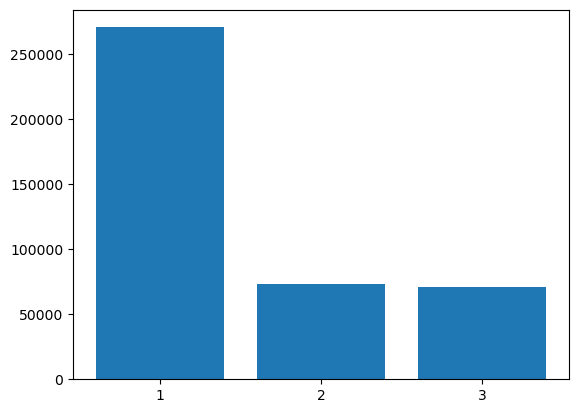

In [10]:
print(smoke['흡연상태'].value_counts()) #index, values

plt.bar(smoke['흡연상태'].value_counts().index, smoke['흡연상태'].value_counts().values)
plt.xticks([1,2,3]) #x축 값 설정
plt.show()

모델이 전부 1로 판단해도 정확도가 0.65가 나올 것임

### 1-2. 중복데이터 확인

In [11]:
#기본키인 '가입자 일련번호'를 기준으로 중복확인
smoke.duplicated(subset='가입자 일련번호').sum()

0

### 1-3. 상관계수 확인 (칼럼 간 연관성)

In [12]:
#콜레스테롤 칼럼들 간의 상관계수 확인 - 유사성
smoke_col = smoke.loc[:,'총 콜레스테롤': '콜레스테롤(LDL)']
smoke_col.corr()

,총 콜레스테롤,트리글리세라이드,콜레스테롤(HDL),콜레스테롤(LDL)
총 콜레스테롤,1.000000,0.190430,0.229217,0.929969
트리글리세라이드,0.190430,1.000000,-0.347563,0.019950
콜레스테롤(HDL),0.229217,-0.347563,1.000000,0.041837
콜레스테롤(LDL),0.929969,0.019950,0.041837,1.000000


총 콜레스테롤과 콜레스테롤(LDL)은 유사도 매우 높음

BUT, 둘 중에 하나만 가져오기에 다른 칼럼과의 연관성이 다르게 나타남
(일단 1개만 가져오기)

이와 더불어, 다중공산성(VIF) 확인 결과 밑의 칼럼을 사용하기로 결정 - 밑에서 코드 확인 가능
- 트리글리세라이드, 콜레스테롤(HDL),  콜레스테롤(LDL)

In [13]:
#간 기능 칼럼들 간의 상관계수 확인 - 유사성
smoke_liver = smoke.loc[:,'간기능검사(AST)': '감마지티피']
smoke_liver.corr()

,간기능검사(AST),간기능검사(ALT),감마지티피
간기능검사(AST),1.000000,0.776154,0.315556
간기능검사(ALT),0.776154,1.000000,0.315900
감마지티피,0.315556,0.315900,1.000000


간기능검사(AST)와 간기능검사(ALT)의 유사도 매우 높음 (감마지티피와는 약한 연관성)

이와 더불어, 다중공산성(VIF) 확인 결과 위의 2개의 칼럼 모두 사용하기로 결정 - 밑에서 코드 확인 가능
- 간기능검사(AST), 감마지티피

In [14]:
#흡연상태와 연관성 있어 보이는 것만 뽑기
#기준년도, 가입자 일련번호, 시도코드, 허리둘레, 시력, 청력, 콜레스테롤(LDL), 간기능검사(ALT), 구강검진수검여부 칼럼 제외
smoke2 = smoke.loc[:,['성별코드', '연령대코드(5세 단위)', '신장(5cm 단위)', '체중(5kg 단위)', '수축기 혈압', '이완기 혈압', '식전혈당(공복혈당)', '트리글리세라이드', '콜레스테롤(HDL)', '콜레스테롤(LDL)', '혈색소', '요단백', '혈청크레아티닌', '간기능검사(AST)',  '간기능검사(ALT)', '감마지티피', '음주여부','흡연상태']]

In [15]:
smoke2.describe()

,성별코드,연령대코드(5세 단위),신장(5cm 단위),체중(5kg 단위),수축기 혈압,이완기 혈압,식전혈당(공복혈당),트리글리세라이드,콜레스테롤(HDL),콜레스테롤(LDL),혈색소,요단백,혈청크레아티닌,간기능검사(AST),간기능검사(ALT),감마지티피,음주여부,흡연상태
count,415768.000000,415768.000000,415768.000000,415768.000000,415768.000000,415768.000000,415768.000000,415768.000000,415768.000000,415768.000000,415768.000000,415768.000000,415768.000000,415768.000000,415768.000000,415768.000000,415768.000000,415768.000000
mean,1.525596,11.908030,160.747039,62.709997,124.646560,76.434524,103.560649,122.979813,57.313204,116.401775,14.112766,1.125106,0.835146,27.666285,26.467686,35.778850,0.567215,1.520011
std,0.499345,2.293873,9.181011,12.428561,14.971359,10.132616,24.340232,67.114856,16.929027,39.169330,1.558423,0.495287,0.413048,20.579685,25.066104,67.046252,0.495462,0.770005
min,1.000000,9.000000,130.000000,30.000000,64.000000,31.000000,26.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.080000,1.000000,1.000000,1.000000,0.000000,1.000000
25%,1.000000,10.000000,155.000000,55.000000,115.000000,70.000000,91.000000,75.000000,47.000000,90.000000,13.100000,1.000000,0.700000,20.000000,15.000000,16.000000,0.000000,1.000000
50%,2.000000,12.000000,160.000000,60.000000,124.000000,76.000000,98.000000,106.000000,55.000000,115.000000,14.100000,1.000000,0.800000,24.000000,21.000000,23.000000,1.000000,1.000000
75%,2.000000,13.000000,165.000000,70.000000,134.000000,82.000000,109.000000,153.000000,66.000000,141.000000,15.200000,1.000000,1.000000,30.000000,30.000000,38.000000,1.000000,2.000000
max,2.000000,18.000000,195.000000,135.000000,240.000000,175.000000,925.000000,399.000000,1020.000000,2385.000000,25.000000,6.000000,85.000000,4876.000000,4354.000000,9999.000000,1.000000,3.000000


In [16]:
#상관관계 확인
smoke2.corr()

,성별코드,연령대코드(5세 단위),신장(5cm 단위),체중(5kg 단위),수축기 혈압,이완기 혈압,식전혈당(공복혈당),트리글리세라이드,콜레스테롤(HDL),콜레스테롤(LDL),혈색소,요단백,혈청크레아티닌,간기능검사(AST),간기능검사(ALT),감마지티피,음주여부,흡연상태
성별코드,1.000000,0.032782,-0.712657,-0.549739,-0.112322,-0.168967,-0.124674,-0.216643,0.267189,0.046335,-0.607254,-0.041943,-0.291931,-0.079574,-0.174650,-0.168361,-0.300498,-0.585644
연령대코드(5세 단위),0.032782,1.000000,-0.358654,-0.218046,0.257374,-0.019285,0.142595,-0.034413,-0.088289,-0.168866,-0.132760,0.025061,0.051665,0.046851,-0.056245,-0.032895,-0.336835,-0.142301
신장(5cm 단위),-0.712657,-0.358654,1.000000,0.650910,-0.013328,0.125576,0.043418,0.160464,-0.163073,0.019037,0.478929,0.020633,0.199654,0.027909,0.134848,0.115094,0.344493,0.464875
체중(5kg 단위),-0.549739,-0.218046,0.650910,1.000000,0.188875,0.257521,0.152736,0.312735,-0.295812,0.009660,0.450341,0.047033,0.172342,0.093393,0.249531,0.141687,0.238896,0.345976
수축기 혈압,-0.112322,0.257374,-0.013328,0.188875,1.000000,0.690698,0.155777,0.153545,-0.081597,-0.037401,0.115959,0.062064,0.047618,0.064304,0.075380,0.077957,-0.039068,0.023742
이완기 혈압,-0.168967,-0.019285,0.125576,0.257521,0.690698,1.000000,0.093801,0.185096,-0.053923,0.050914,0.247572,0.041753,0.042668,0.066928,0.108121,0.101358,0.087419,0.099653
식전혈당(공복혈당),-0.124674,0.142595,0.043418,0.152736,0.155777,0.093801,1.000000,0.183725,-0.117677,-0.106646,0.116775,0.113740,0.056299,0.067850,0.109999,0.109844,-0.003397,0.084923
트리글리세라이드,-0.216643,-0.034413,0.160464,0.312735,0.153545,0.185096,0.183725,1.000000,-0.347563,0.019950,0.259518,0.047474,0.077399,0.080141,0.173680,0.176472,0.078455,0.217795
콜레스테롤(HDL),0.267189,-0.088289,-0.163073,-0.295812,-0.081597,-0.053923,-0.117677,-0.347563,1.000000,0.041837,-0.161527,-0.028528,-0.107693,-0.017762,-0.101484,-0.021657,0.039045,-0.163933
콜레스테롤(LDL),0.046335,-0.168866,0.019037,0.009660,-0.037401,0.050914,-0.106646,0.019950,0.041837,1.000000,0.109718,-0.032207,-0.022248,-0.021710,0.008130,-0.021234,0.037915,-0.020180


In [17]:
#글씨체 깨짐 방지
plt.rcParams['font.family'] = 'NanumGothic'

c:\Users\pc\anaconda3\Lib\site-packages\seaborn\utils.py:80: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.draw()
C:\Users\pc\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


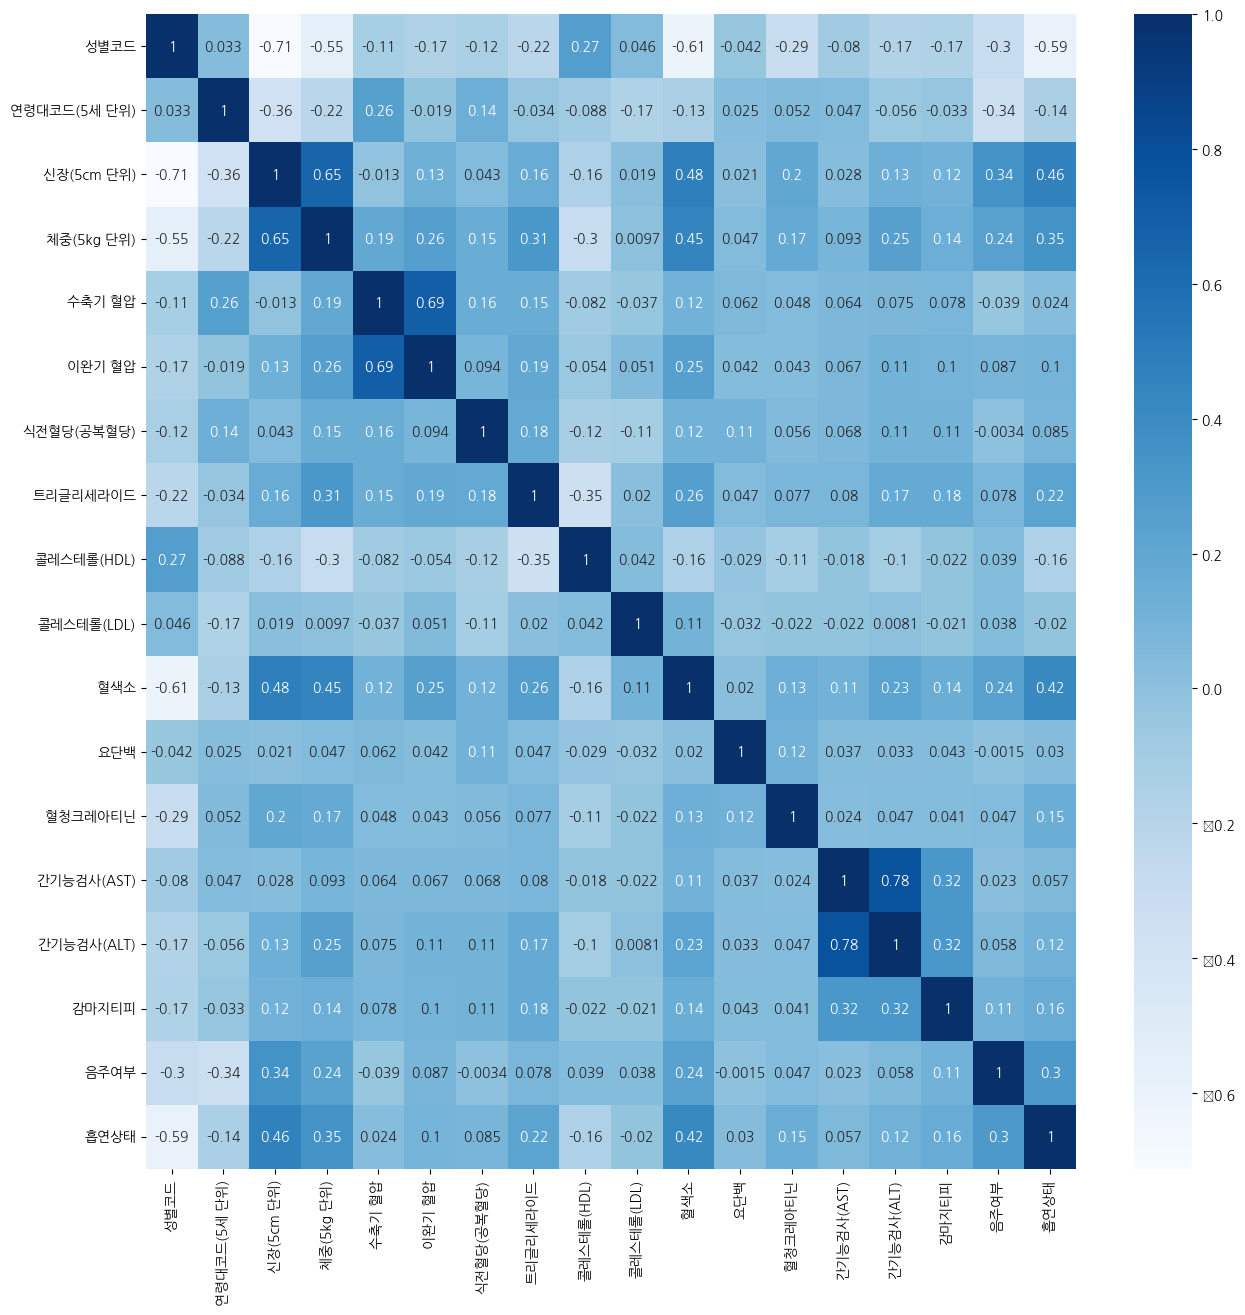

In [18]:
#상관관계 확인(시각화)
plt.figure(figsize = (15,15), dpi = 100)
sns.heatmap(smoke2.corr(), annot = True, cmap = 'Blues')
plt.show()

- 흡연상태와 연관된 칼럼 (절댓값 0.3이상만)
    - 성별코드 (-0.59)
    - 신장 (0.46)
    - 체중 (0.34)
    - 혈색소 (0.41)
    - 음주여부 (0.3)


In [19]:
smoke2.loc[:,['흡연상태', '성별코드', '신장(5cm 단위)', '체중(5kg 단위)', '혈색소', '음주여부']].corr()

,흡연상태,성별코드,신장(5cm 단위),체중(5kg 단위),혈색소,음주여부
흡연상태,1.000000,-0.585644,0.464875,0.345976,0.416625,0.297700
성별코드,-0.585644,1.000000,-0.712657,-0.549739,-0.607254,-0.300498
신장(5cm 단위),0.464875,-0.712657,1.000000,0.650910,0.478929,0.344493
체중(5kg 단위),0.345976,-0.549739,0.650910,1.000000,0.450341,0.238896
혈색소,0.416625,-0.607254,0.478929,0.450341,1.000000,0.238977
음주여부,0.297700,-0.300498,0.344493,0.238896,0.238977,1.000000


- 성별과 신장(-0.71), 성별과 체중(-0.55), 성별과 혈색소(-0.61), 성별과 음주여부(-0.3)
- 신장과 체중(0.65), 신장과 혈색소(0.48), 신장과 음주여부(0.34)
- 체중과 혈색소(0.45)

칼럼 별 상관성이 매우 많이 보임 (복잡하게 얽혀있음)

### 1-4. 이상치 처리

In [20]:
#각 칼럼 별 이상치 개수 파악 
for column in smoke2.columns:
    Q1 = smoke2[column].quantile(0.25)
    Q2 = smoke2[column].quantile(0.50)
    Q3 = smoke2[column].quantile(0.75)
    IQR = Q3 - Q1

    outliers = ((smoke2[column] < (Q1 - 1.5 * IQR)) | (smoke2[column] > (Q3 + 1.5 * IQR)))
    num = outliers.sum()

    print(f'{column}에서의 outlier 개수: {num}')
    print()

성별코드에서의 outlier 개수: 0

연령대코드(5세 단위)에서의 outlier 개수: 2450

신장(5cm 단위)에서의 outlier 개수: 3071

체중(5kg 단위)에서의 outlier 개수: 7739

수축기 혈압에서의 outlier 개수: 5773

이완기 혈압에서의 outlier 개수: 7005

식전혈당(공복혈당)에서의 outlier 개수: 27243

트리글리세라이드에서의 outlier 개수: 18226

콜레스테롤(HDL)에서의 outlier 개수: 6945

콜레스테롤(LDL)에서의 outlier 개수: 3436

혈색소에서의 outlier 개수: 5184

요단백에서의 outlier 개수: 31646

혈청크레아티닌에서의 outlier 개수: 4203

간기능검사(AST)에서의 outlier 개수: 27048

간기능검사(ALT)에서의 outlier 개수: 28264

감마지티피에서의 outlier 개수: 36027

음주여부에서의 outlier 개수: 0

흡연상태에서의 outlier 개수: 0



In [21]:
#이상치를 포함한 행 삭제 (연령대, 신장, 체중, 허리둘레 부분 제외 - 해당 부분은 이미 임의로 구간처리된 값으로 이상치라 보기 어려울 것 같다고 판단 / 허리둘레 또한 체중과 유사하므로 앞처럼 판단)
smoke_no_outliers = smoke2.copy()

columns_to_check = ["수축기 혈압","이완기 혈압","식전혈당(공복혈당)","트리글리세라이드","콜레스테롤(HDL)","콜레스테롤(LDL)","혈색소","요단백","혈청크레아티닌","간기능검사(AST)","간기능검사(ALT)","감마지티피"]

for column in columns_to_check:
    Q1 = smoke_no_outliers[column].quantile(0.25)
    Q3 = smoke_no_outliers[column].quantile(0.75)
    IQR = Q3 - Q1


    outliers = ((smoke_no_outliers[column] < (Q1 - 1.5 * IQR)) | (smoke_no_outliers[column] > (Q3 + 1.5 * IQR)))

    smoke_no_outliers = smoke_no_outliers[~outliers]

In [22]:
#최종 데이터셋
smoke_no_outliers.shape

(263799, 18)

## 3. EDA

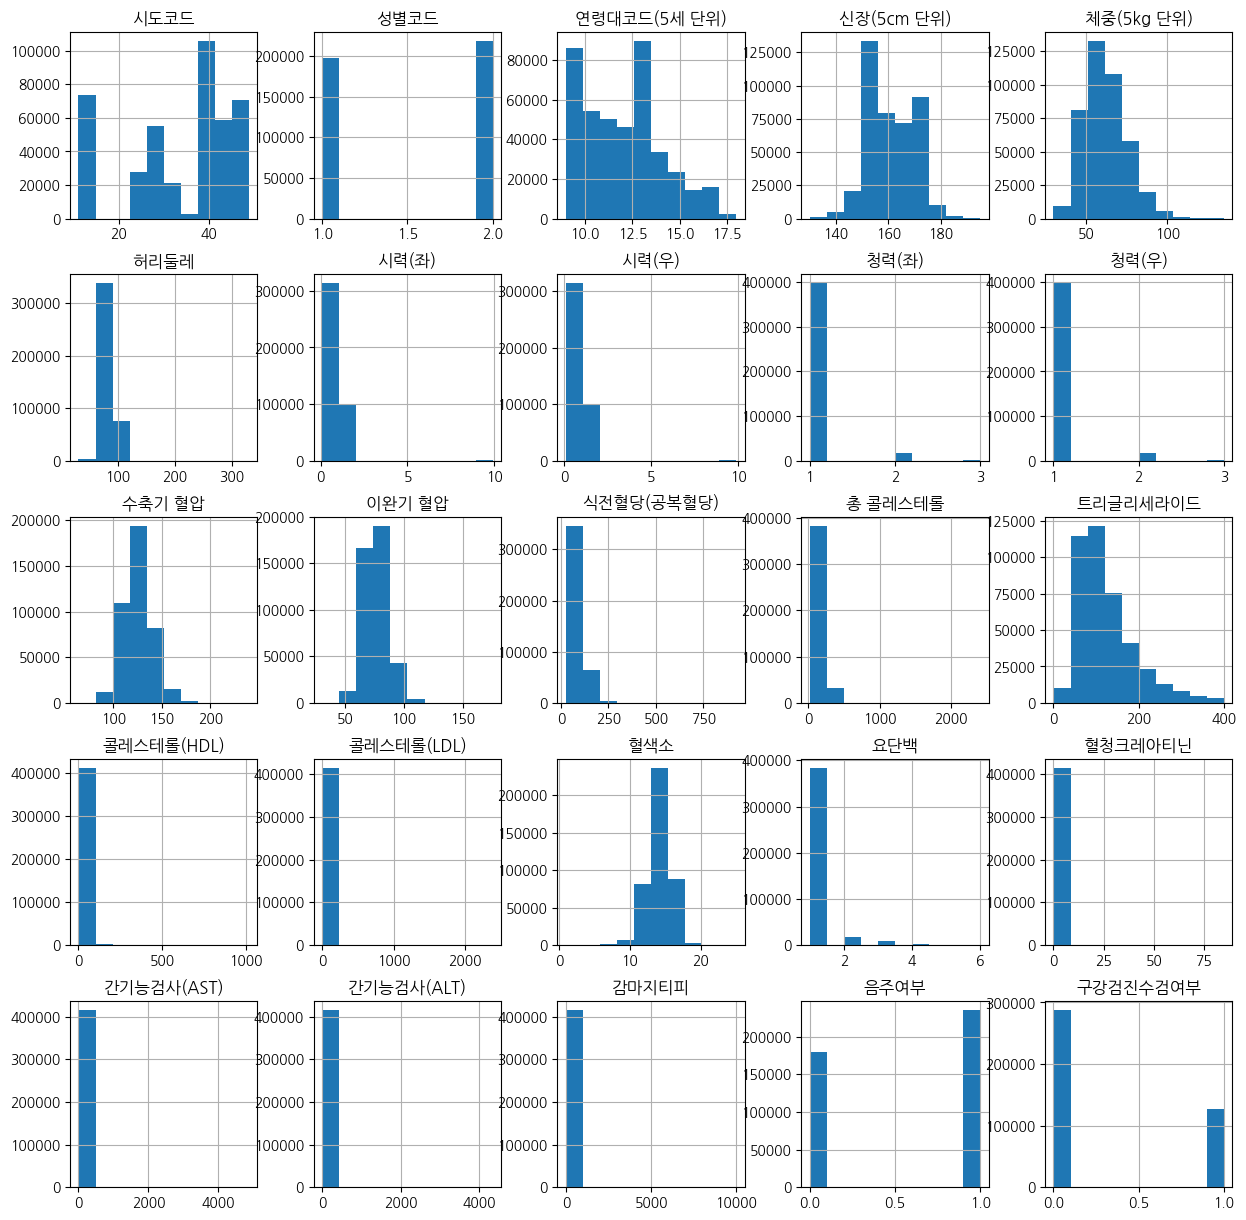

In [23]:
#피처 분포 확인
except_target = smoke.drop(['기준년도','가입자 일련번호','흡연상태'], axis = 1)
except_target.hist(figsize = (15,15))
plt.show()

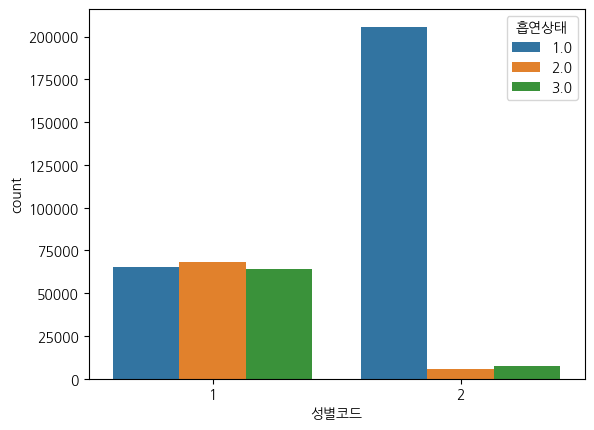

In [24]:
#성별코드 별 흡연상태 확인
sns.countplot(x ='성별코드', hue = '흡연상태', data = smoke)
plt.show()

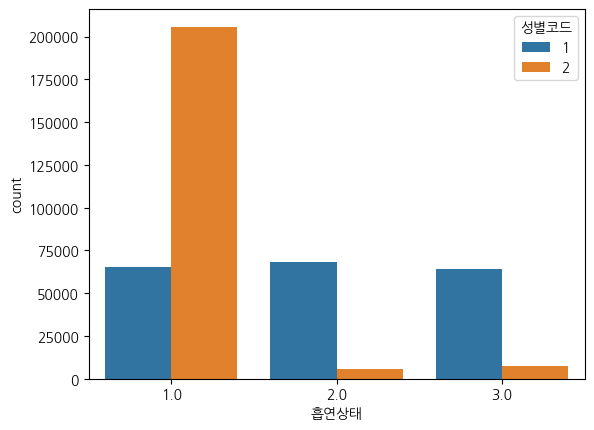

In [25]:
#흡연상태 별 성별코드 확인
sns.countplot(x ='흡연상태', hue = '성별코드', data = smoke)
plt.show()

- 남성의 경우, 흡연상태 1,2,3 개수가 비슷하게 나옴
- 여성의 경우, 피우지 않는 수가 압도적으로 높음
> 흡연상태 피우지 않음(여성이 엄청 높음) / 흡연상태 2,3 모두 남성이 높음

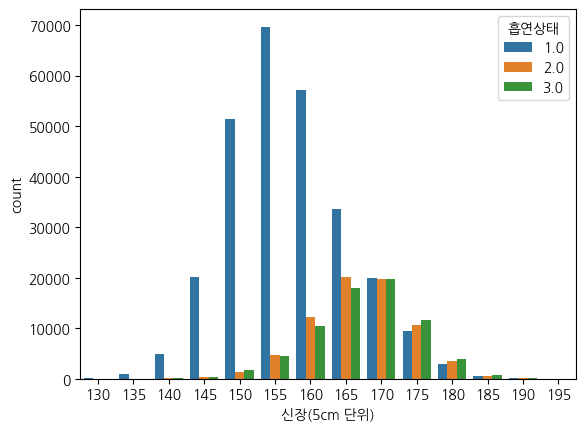

In [26]:
#신장 별 흡연상태 확인
sns.countplot(x ='신장(5cm 단위)', hue = '흡연상태', data = smoke)
plt.show()

- 145-165의 경우, 피우지 않는 수가 높음
- 160-180의 경우, 흡연상태 2와3도 높아졌다가 낮아짐
>성별과 신장은 강한 음의 상관관계(-0.71)로 남성의 경우, 신장이 높음

> 즉, 위의 경우에 보통 여성이 해당하고 아래 경우에 남성이 해당하기에 위와 같은 결과가 나옴

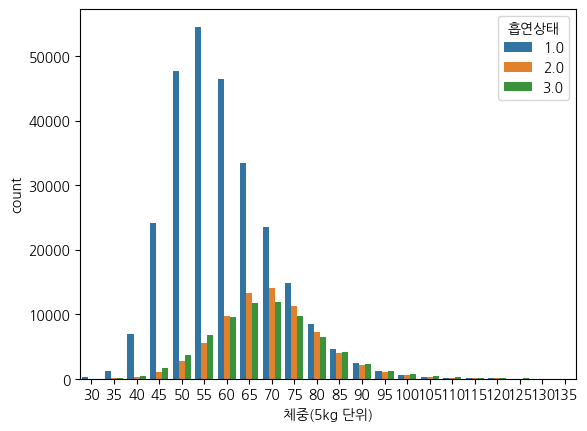

In [27]:
#체중 별 흡연상태 확인
sns.countplot(x ='체중(5kg 단위)', hue = '흡연상태', data = smoke)
plt.show()

성별, 신장과 섞여서 위와 비슷한 결과

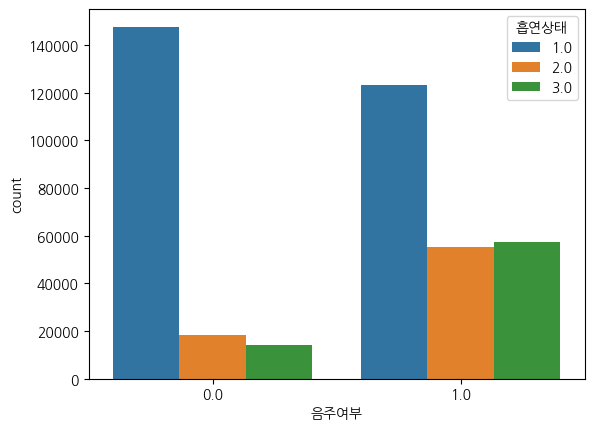

In [28]:
#음주여부 별 흡연상태 확인
sns.countplot(x ='음주여부', hue = '흡연상태', data = smoke)
plt.show()

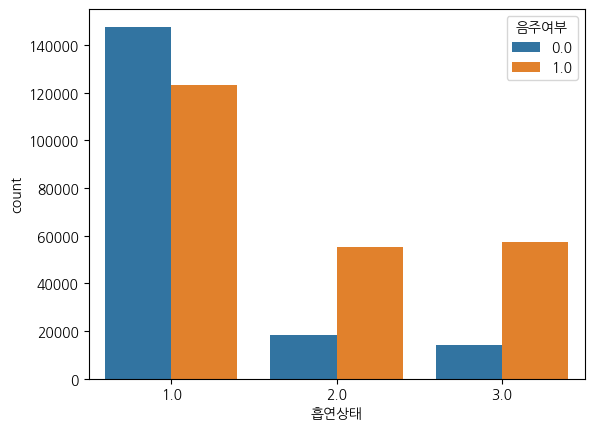

In [29]:
#흡연상태 별 음주여부 확인
sns.countplot(x ='흡연상태', hue = '음주여부', data = smoke)
plt.show()

- 흡연하지 않은 경우, 음주 안하는 경우가 높음 (둘 다 높긴한데)
- 흡연하는 경우, 음주를 하는 경우가 많음

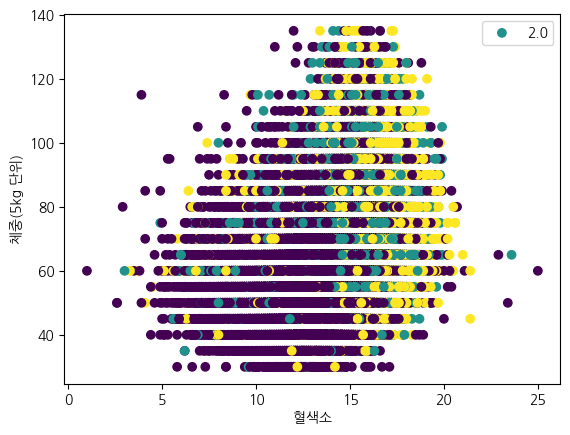

In [30]:
#산점도 - Outcome과 상관계수가 높은 칼럼 기준, 그와 상관계수가 높은 것과 연관지음
plt.scatter(smoke2['혈색소'],smoke2['체중(5kg 단위)'], c=smoke2['흡연상태'])

plt.xlabel('혈색소')
plt.ylabel('체중(5kg 단위)')
plt.legend(smoke2['흡연상태'])


## 4. 머신러닝
> 총 6개의 머신러닝 중에서 가장 성능이 좋게 나타난 2가지를 선택

In [31]:
#정답과 문제 칼럼 분리
feature_names = smoke_no_outliers.columns[:-1].tolist()
label_name = smoke_no_outliers.columns[-1]

In [32]:
#train, test 분리 / 정답과 문제 데이터 분리
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(smoke_no_outliers[feature_names],smoke_no_outliers[label_name], random_state=42, stratify=smoke_no_outliers[label_name]) #편향 없애기

In [33]:
print(X_train.shape)
print(y_train.shape) #둘의 행 일치해야

print(X_test.shape)
print(y_test.shape) #둘의 행 일치해야

(197849, 17)
(197849,)
(65950, 17)
(65950,)


**참고: VIF 확인**

In [34]:
#위에서 언급한 VIF확인 >> 총 콜레스테롤 수치가 높으므로 삭제, 간기능검사(ALT, AST) 수치는 10보다 작으므로 남김 
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

def feature_engineering(X_train):
    vif=pd.DataFrame()
    vif["VIF_Factor"] = [variance_inflation_factor(X_train.values, i)
                         for i in range(X_train.shape[1])]
    vif['Feature'] = X_train.columns
    return vif

vif=feature_engineering(smoke.iloc[:, :-1])
print(vif)

     VIF_Factor       Feature
0   1892.726307          기준년도
1      1.000063      가입자 일련번호
2      1.006315          시도코드
3      3.605952          성별코드
4      1.956100  연령대코드(5세 단위)
5      3.574395    신장(5cm 단위)
6      5.962302    체중(5kg 단위)
7      4.152687          허리둘레
8      1.103004         시력(좌)
9      1.102325         시력(우)
10     1.449337         청력(좌)
11     1.444921         청력(우)
12     2.297212        수축기 혈압
13     2.180294        이완기 혈압
14     1.118788    식전혈당(공복혈당)
15    30.436353       총 콜레스테롤
16     3.635408      트리글리세라이드
17     3.528007    콜레스테롤(HDL)
18    26.211044    콜레스테롤(LDL)
19     1.812967           혈색소
20     1.031167           요단백
21     1.117709       혈청크레아티닌
22     2.698684    간기능검사(AST)
23     2.863734    간기능검사(ALT)
24     1.188449         감마지티피
25     1.618063          흡연상태
26     1.293414          음주여부


### 4-1. 그레이디언트 부스팅(GBM) 

In [35]:
from sklearn.ensemble import GradientBoostingClassifier

gbrt = GradientBoostingClassifier(random_state=42)
gbrt.fit(X_train, y_train)

print("훈련 세트 정확도: {:.3f}".format(gbrt.score(X_train, y_train)))
print("테스트 세트 정확도: {:.3f}".format(gbrt.score(X_test, y_test)))

훈련 세트 정확도: 0.761
테스트 세트 정확도: 0.755


In [36]:
# #GBM 그리드 서치
# from sklearn.model_selection import GridSearchCV
# param = {
#     'n_estimators' : [100, 300, 500], #훈련횟수(기본 100)
#     'max_depth': range(1, 20, 5),
#     'learning_rate' : [0.01, 0.1, 0.3, 0.5] #학습률
# }
# gs = GridSearchCV(gbrt, param_grid=param, scoring='accuracy', cv=5, n_jobs=-1) #k-fold 교차검증 또한 수행함
# gs.fit(X_train, y_train)

# print(gs.best_score_)
# print(gs.best_params_)

In [37]:
from sklearn.ensemble import GradientBoostingClassifier

gbrt = GradientBoostingClassifier(random_state=42, max_depth=6, learning_rate=0.05)
gbrt.fit(X_train, y_train)

print("훈련 세트 정확도: {:.3f}".format(gbrt.score(X_train, y_train)))
print("테스트 세트 정확도: {:.3f}".format(gbrt.score(X_test, y_test)))

훈련 세트 정확도: 0.772
테스트 세트 정확도: 0.756


In [38]:
from sklearn.ensemble import GradientBoostingClassifier

gbrt = GradientBoostingClassifier(random_state=42, max_depth=6, learning_rate=0.1)
gbrt.fit(X_train, y_train)

print("훈련 세트 정확도: {:.3f}".format(gbrt.score(X_train, y_train)))
print("테스트 세트 정확도: {:.3f}".format(gbrt.score(X_test, y_test)))

훈련 세트 정확도: 0.780
테스트 세트 정확도: 0.756


In [39]:
#피쳐 중요도 확인
from sklearn.inspection import permutation_importance

gbrt.fit(X_train, y_train)
result = permutation_importance(gbrt, X_train, y_train, n_repeats=5,
                                random_state=42, n_jobs=-1) #n_repeats은 랜덤하게 섞을 횟수
print(result.importances_mean)
sns.barplot(x=result.importances_mean, y=feature_names)

KeyboardInterrupt: 

### 4-2. 히스토그램 기반 그레이디언트 부스팅

In [ ]:
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingClassifier

hgb = HistGradientBoostingClassifier(random_state=42)
hgb.fit(X_train, y_train)

print("훈련 세트 정확도: {:.3f}".format(hgb.score(X_train, y_train)))
print("테스트 세트 정확도: {:.3f}".format(hgb.score(X_test, y_test)))

훈련 세트 정확도: 0.771
테스트 세트 정확도: 0.756


In [ ]:
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingClassifier

hgb = HistGradientBoostingClassifier(random_state=42, max_depth=6, learning_rate=0.05)
hgb.fit(X_train, y_train)

print("훈련 세트 정확도: {:.3f}".format(hgb.score(X_train, y_train)))
print("테스트 세트 정확도: {:.3f}".format(hgb.score(X_test, y_test)))

c:\Users\pc\anaconda3\Lib\site-packages\sklearn\experimental\enable_hist_gradient_boosting.py:15: UserWarning: Since version 1.0, it is not needed to import enable_hist_gradient_boosting anymore. HistGradientBoostingClassifier and HistGradientBoostingRegressor are now stable and can be normally imported from sklearn.ensemble.
  warnings.warn(


훈련 세트 정확도: 0.768
테스트 세트 정확도: 0.756


[0.0720964  0.01758311 0.00501999 0.01683304 0.00372708 0.00250393
 0.00302958 0.0040728  0.00643723 0.00361387 0.0078565  0.00442964
 0.00327725 0.00706802 0.0125712  0.02084923]


<Axes: >

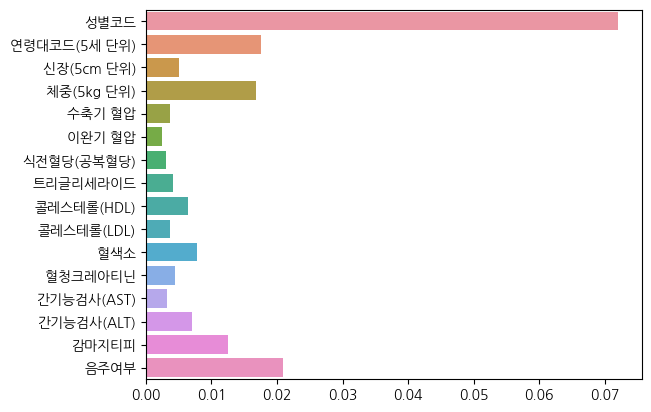

In [ ]:
#피쳐 중요도 확인
from sklearn.inspection import permutation_importance

hgb.fit(X_train, y_train)
result = permutation_importance(hgb, X_train, y_train, n_repeats=5,
                                random_state=42, n_jobs=-1) #n_repeats은 랜덤하게 섞을 횟수
print(result.importances_mean)
sns.barplot(x=result.importances_mean, y=feature_names)

Colab 환경에서 위의 Gridsearch 돌려서 결과값 확인 </br>
약 0.7573 ('learning_rate': 0.05, 'max_depth': 6) / 훈련횟수를 높였음